In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [3]:
df=pd.read_csv('student-por_2.csv',sep=';')
df.head

<bound method NDFrame.head of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freet

(array([373., 154.,  52.,  38.,  11.,  13.,   4.,   1.,   1.,   2.]),
 array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. , 19.2, 22.4, 25.6, 28.8, 32. ]),
 <BarContainer object of 10 artists>)

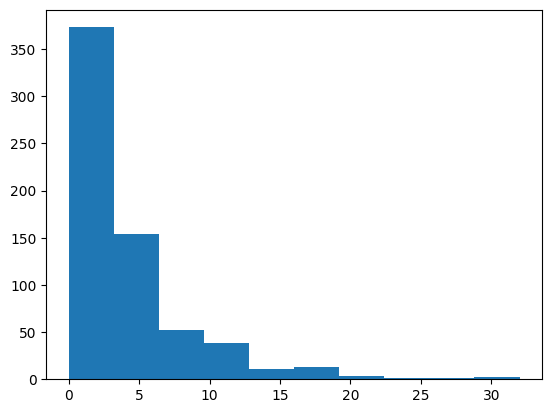

In [6]:
plt.hist(df['absences'])

In [7]:
def lamb_exp(data):
    return 1/(np.mean(data))

In [8]:
lam = lamb_exp(df['absences'])

In [9]:
print(lam)

0.2732631578947368


In [14]:
def likelihood_fn(param,data):
    '''
    param = parameters of distribution
    data = data from distribution
    '''
    lam = param
    pdf = lam*np.exp(-lam*data)
    pdf[pdf<=0]=np.finfo(float).eps
    log_like = np.log(pdf)
    return - np.sum(log_like)

In [15]:
for i in range(10):
    sol = minimize(likelihood_fn,i,args = df['absences'],method = 'Powell',bounds = ((0,None),))
    print(sol.x,i)


[0.27326316] 0
[0.27326218] 1
[0.27326218] 2
[0.27326218] 3
[0.27326218] 4
[0.27326218] 5
[0.27326218] 6
[0.27326218] 7
[0.27326218] 8
[0.27326218] 9
